In [1]:
import numpy as np
from matplotlib import pyplot as plt

import local

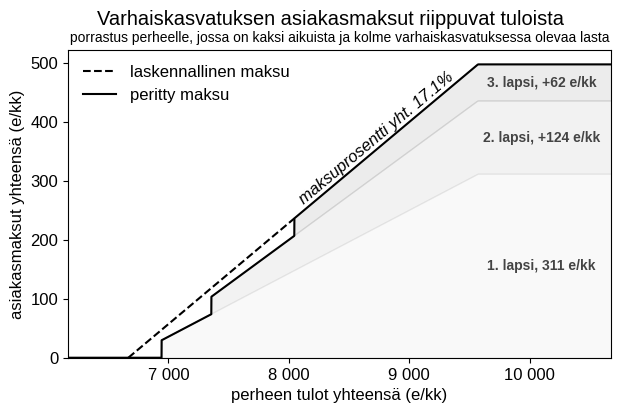

In [2]:
m = local.säännöt.Maksut(3, 2)

fig = plt.figure(figsize=(7, 4))
ax = plt.gca()

plt.suptitle("Varhaiskasvatuksen asiakasmaksut riippuvat tuloista")
plt.title(f"porrastus perheelle, jossa on {local.teksti.aikuisia(m.m)} ja {local.teksti.lapsia(m.n)}", size=10)

ax.xaxis.set_major_formatter(local.plot.kformatter)
ax.set_xlabel("perheen tulot yhteensä (e/kk)", size=12)
ax.set_ylabel("asiakasmaksut yhteensä (e/kk)", size=12)

ax.plot(m.x[m.i], m.y[m.i], linestyle="--", label="laskennallinen maksu")
ax.plot(m.x, m.z, label="peritty maksu")
ax.set_xlim(m.x0 - 500, m.x1 + 1100)
ax.set_ylim(0, None)

local.plot.slope_label(ax, m)
local.plot.fan_fill(ax, m, True)

ax.legend(loc="upper left").set_frame_on(False)

plt.savefig(f"asiakasmaksut_{m.n}_{m.m}.png", bbox_inches="tight")

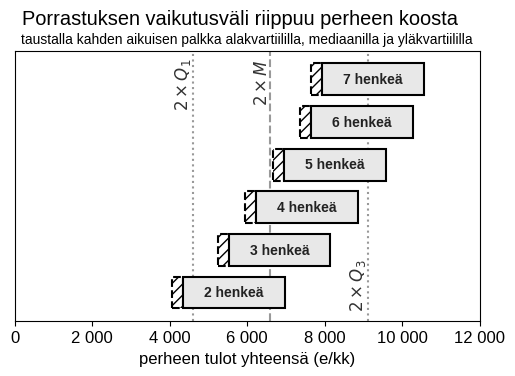

In [3]:
plt.figure(figsize=(6, 3.5))
ax = plt.gca()

plt.suptitle("Porrastuksen vaikutusväli riippuu perheen koosta", y=1)
plt.title("taustalla kahden aikuisen palkka alakvartiililla, mediaanilla ja yläkvartiililla", size=10)

ax.xaxis.set_major_formatter(local.plot.kformatter)
ax.set_xlabel("perheen tulot yhteensä (e/kk)", size=12)
ax.yaxis.set_ticks([])

h = 0.75
n = np.arange(2, 8)
x0 = np.array([local.säännöt.tuloraja(i) for i in n])
x1 = x0 + local.säännöt.maksukynnys / local.säännöt.maksuprosentti
w = [(local.säännöt.enimmäismaksu0 - local.säännöt.maksukynnys) / local.säännöt.maksuprosentti] * len(n)

ax.barh(n, x1 - x0, h, x0, fill=None, edgecolor="k", linewidth=1.5, linestyle="--", label="tuloraja", hatch="///")
ax.barh(n, w, h, x1, color="#e8e8e8", edgecolor="k", linewidth=1.5, label="porrastus")

for i, x in zip(n, x1):
    x = x + w[0] / 2
    ax.text(x, i, f"{i} henkeä", size=10, weight=600, color="#222", va="center", ha="center")

xq1 = (2240 + 2333 + 2353 + 2262) / 4
xmd = (3300 + 3321 + 3324 + 3234) / 4
xq3 = (4592 + 4592 + 4547 + 4511) / 4
ax.axvline(2 * xq1, zorder=-1, color="#999", linestyle=":")
ax.axvline(2 * xmd, zorder=-1, color="#999", linestyle="--")
ax.axvline(2 * xq3, zorder=-1, color="#999", linestyle=":")

style = dict(size=12, rotation=90, color="#333", va="top", ha="right")
ax.text(2 * xq1 - 0, 7.5, "$2 \\times Q_1$", **style)
ax.text(2 * xmd - 0, 7.5, "$2 \\times M$", **style)
ax.text(2 * xq3 - 0, 2.8, "$2 \\times Q_3$", **style)

ax.set_xlim(0, 12_000)

plt.savefig(f"tulorajat.png", bbox_inches="tight")